## Predicting Movie Revenues With Regression Models Using Python

### Task 1: Load and Inspect the Dataset 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("movies.csv")
df

,title,main_genre,belongs_to_collection,budget,revenue,production_companies,vote_average,popularity,runtime,cast_size,crew_size,cast_tr,director_tr,production_company_tr,English,title_length,rel_year,rel_month
0,Central Station,Drama,False,2.9,5.596708,3.0,7.6,4.919716,113.0,19,43,0.000000,0.000000,0.000000,False,14,1998,January
1,Hard Rain,Thriller,False,70.0,19.870567,9.0,5.5,6.363405,97.0,10,82,2361.750386,12.890752,14585.748889,True,8,1998,January
2,Half Baked,Comedy,False,8.0,17.460020,1.0,6.4,7.022548,82.0,12,8,119.943461,44.442512,13181.546450,True,9,1998,January
3,Great Expectations,Comedy,False,25.0,55.494066,2.0,6.4,9.941228,111.0,10,6,726.339145,0.000000,10393.573468,True,17,1998,January
4,Buffalo '66,Romance,False,1.5,2.375097,NaN,7.2,9.167761,110.0,26,13,366.582721,0.000000,NaN,True,10,1998,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3661,Atomic Blonde,Action,False,30.0,90.007945,5.0,6.1,14.455104,115.0,23,96,5208.358646,0.000000,0.208588,True,12,2017,July
3662,The Emoji Movie,Comedy,False,50.0,66.913939,2.0,5.8,33.694599,86.0,33,46,2120.117991,30.000000,31840.881695,True,13,2017,July
3663,The Dark Tower,Action,False,60.0,71.000000,4.0,5.7,50.903593,95.0,50,199,3767.974906,7.594693,4528.739344,True,12,2017,August
3664,Wind River,Action,False,11.0,184.770205,3.0,7.4,40.796775,111.0,22,18,2159.066587,0.000000,171.539887,True,9,2017,August


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3666 entries, 0 to 3665
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  3666 non-null   object 
 1   main_genre             3658 non-null   object 
 2   belongs_to_collection  3666 non-null   bool   
 3   budget                 3666 non-null   float64
 4   revenue                3666 non-null   float64
 5   production_companies   3521 non-null   float64
 6   vote_average           3662 non-null   float64
 7   popularity             3666 non-null   float64
 8   runtime                3654 non-null   float64
 9   cast_size              3666 non-null   int64  
 10  crew_size              3666 non-null   int64  
 11  cast_tr                3657 non-null   float64
 12  director_tr            3661 non-null   float64
 13  production_company_tr  3521 non-null   float64
 14  English                3666 non-null   bool   
 15  titl

-> Some columns have missing values (NaN)

### Column Information

__Labels (Target Variable of Prediction)__ 

revenue: the movie´s box office revenue in Million USD (MUSD)

__Feature Variables:__

- title: movie title (for information purposes only, not to be used in regression) 
- main_genre: the main genre of the movie (e.g. Drama)
- belongs_to_collection: Whether the movie belongs to a collection/franchise (True) or not (False). Example: Star Wars
- budget: the movie´s budget in Million USD (MUSD) 
- production_companies: number of involved production companies
- vote_average: Average vote by preview audience. From 1 (very bad) to 10 (excellent)
- popularity: the movie´s popularity measured in google searches, social media posts, etc.
- runtime: runtime of the movie in minutes
- cast_size: number of actors involved
- crew_size: number of crew members involved
- cast_tr: Track Record of the movie´s three main actors (aggregated box-office revenues in MUSD prior to this movie)
- director_tr: Track Record of the movie´s director (aggregated box-office revenues in MUSD prior to this movie)
- production_company_tr: Track Record of the movie´s production company (aggregated box-office revenues in MUSD prior to this movie)
- English: Whether the movie´s original language is English (True) or not (False)
- title_length: number of characters in the movie title
- rel_year: the movie´s year of release
- rel_month: the movie´s month of release

In [5]:
df.describe()

,budget,revenue,production_companies,vote_average,popularity,runtime,cast_size,crew_size,cast_tr,director_tr,production_company_tr,title_length,rel_year
count,3666.000000,3666.000000,3521.000000,3662.000000,3666.000000,3654.000000,3666.000000,3666.000000,3657.000000,3661.000000,3521.000000,3666.000000,3666.000000
mean,37.967148,105.421380,3.513206,6.213053,10.458992,109.718664,24.468631,33.419531,1894.761487,290.398374,5726.472446,13.135843,2008.168031
std,45.120849,185.822130,2.332797,0.865616,16.089384,20.448749,21.002806,36.928229,2341.460368,708.296750,9916.842612,6.884674,5.330202
min,0.000001,0.000001,1.000000,1.000000,0.001880,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1998.000000
25%,8.000000,8.006743,2.000000,5.700000,5.858285,95.000000,13.000000,10.000000,130.577558,0.000000,0.173066,9.000000,2004.000000
50%,21.000000,38.029167,3.000000,6.200000,8.718403,106.000000,18.000000,19.000000,991.792599,17.496992,357.182732,12.000000,2009.000000
75%,50.000000,116.463053,5.000000,6.800000,12.114949,120.000000,28.000000,44.000000,2819.038392,262.598896,6396.978333,16.000000,2013.000000
max,380.000000,2787.965087,26.000000,9.000000,547.488298,338.000000,224.000000,435.000000,20450.834225,9073.275833,46180.723661,72.000000,2017.000000


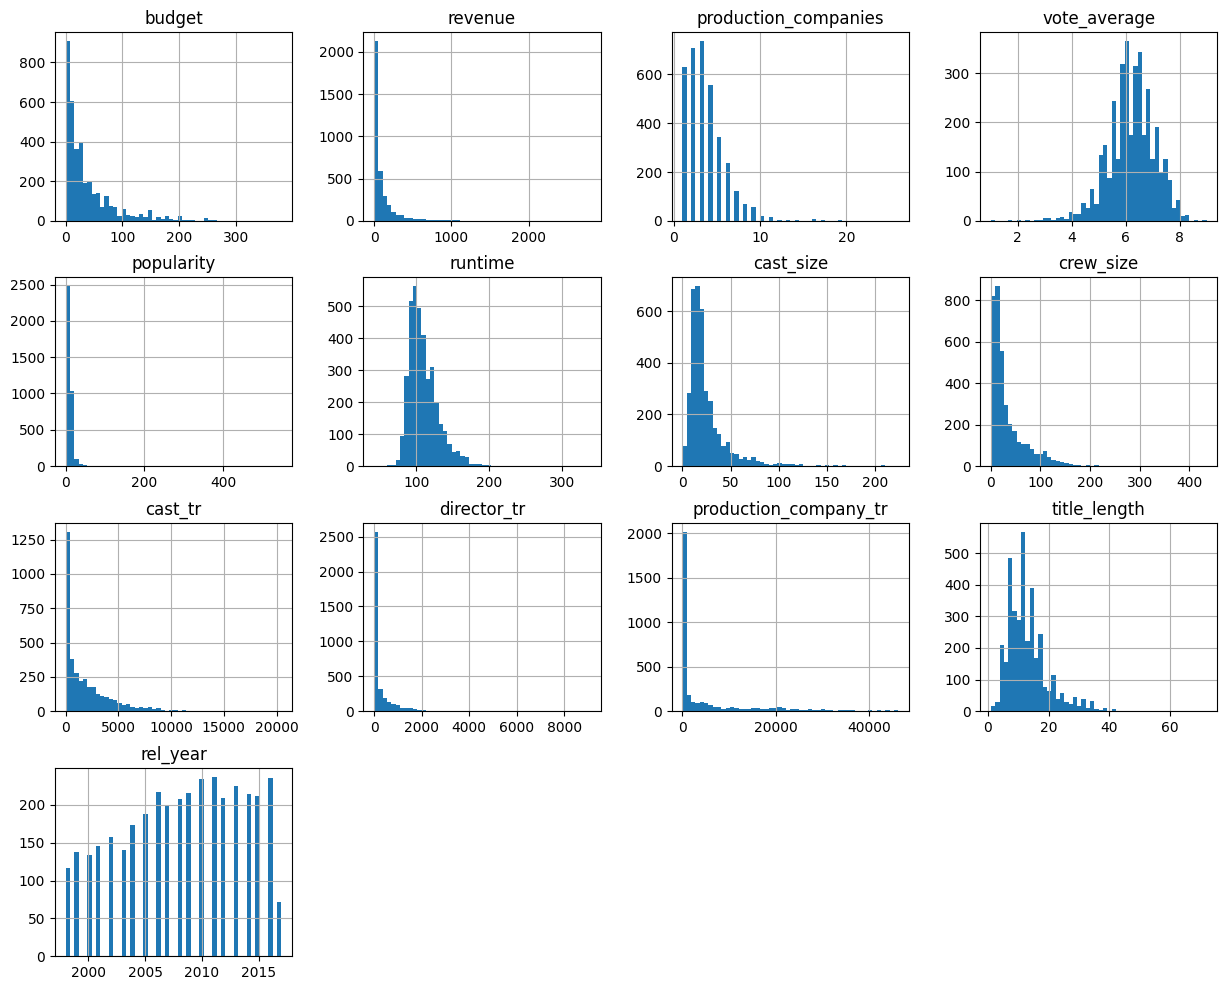

In [6]:
df.hist(figsize = (15, 12), bins = 50)
plt.show()

### Drop Titles

In [7]:
df = df.drop('title', axis=1)
df

,main_genre,belongs_to_collection,budget,revenue,production_companies,vote_average,popularity,runtime,cast_size,crew_size,cast_tr,director_tr,production_company_tr,English,title_length,rel_year,rel_month
0,Drama,False,2.9,5.596708,3.0,7.6,4.919716,113.0,19,43,0.000000,0.000000,0.000000,False,14,1998,January
1,Thriller,False,70.0,19.870567,9.0,5.5,6.363405,97.0,10,82,2361.750386,12.890752,14585.748889,True,8,1998,January
2,Comedy,False,8.0,17.460020,1.0,6.4,7.022548,82.0,12,8,119.943461,44.442512,13181.546450,True,9,1998,January
3,Comedy,False,25.0,55.494066,2.0,6.4,9.941228,111.0,10,6,726.339145,0.000000,10393.573468,True,17,1998,January
4,Romance,False,1.5,2.375097,NaN,7.2,9.167761,110.0,26,13,366.582721,0.000000,NaN,True,10,1998,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3661,Action,False,30.0,90.007945,5.0,6.1,14.455104,115.0,23,96,5208.358646,0.000000,0.208588,True,12,2017,July
3662,Comedy,False,50.0,66.913939,2.0,5.8,33.694599,86.0,33,46,2120.117991,30.000000,31840.881695,True,13,2017,July
3663,Action,False,60.0,71.000000,4.0,5.7,50.903593,95.0,50,199,3767.974906,7.594693,4528.739344,True,12,2017,August
3664,Action,False,11.0,184.770205,3.0,7.4,40.796775,111.0,22,18,2159.066587,0.000000,171.539887,True,9,2017,August


### Split Training/Test Data

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, random_state=42, test_size=0.25, shuffle=True)

In [9]:
corr_matrix = X_train.select_dtypes(include=['float', 'int']).corr()

In [48]:
from seaborn import heatmap

heatmap(df.corr(), annot = True, cmap = 'RdBu', vmax = 0.8)

ValueError: could not convert string to float: 'Drama'

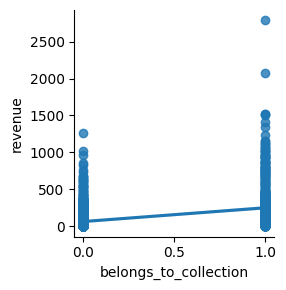

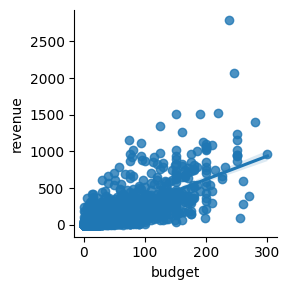

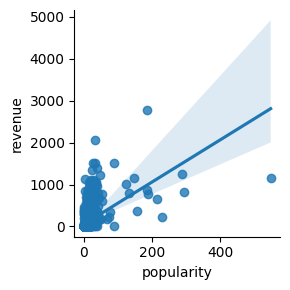

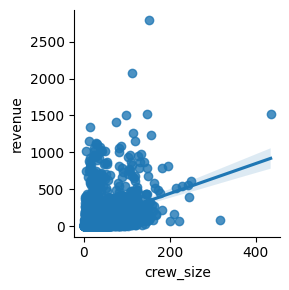

In [ ]:
from seaborn import lmplot

HEIGHT = 3
features = ['belongs_to_collection', 'budget', 'popularity', 'crew_size']
for feature in features:
    lmplot(data = X_train, x = feature, y = 'revenue', height = HEIGHT)

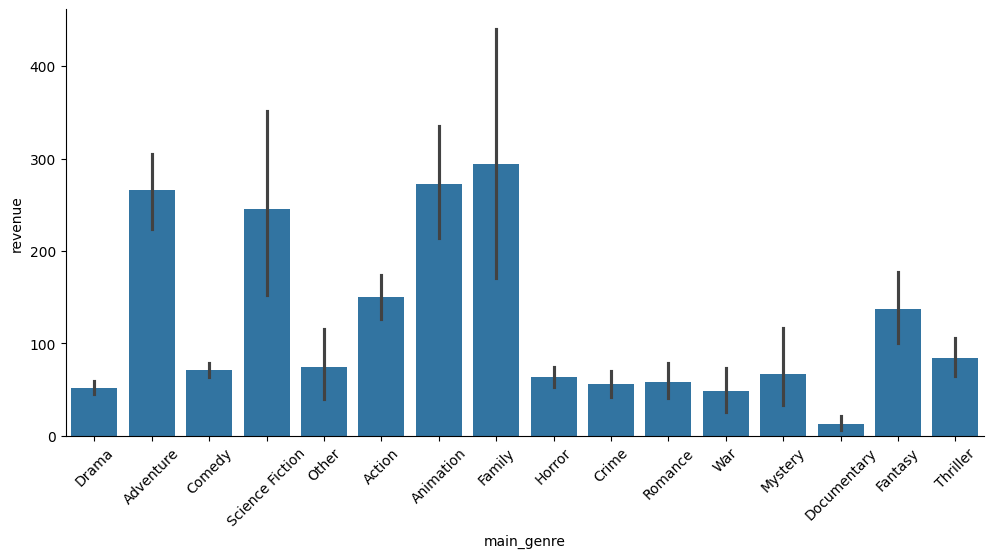

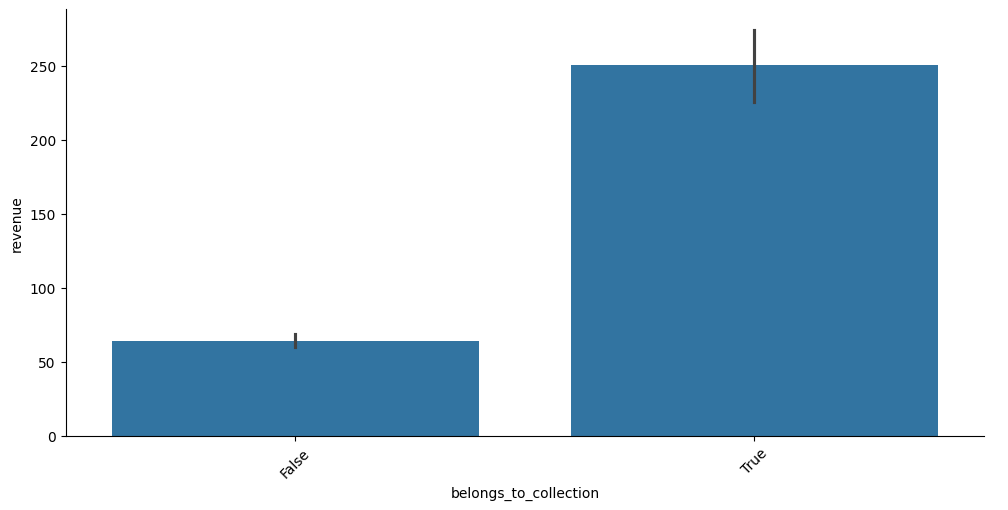

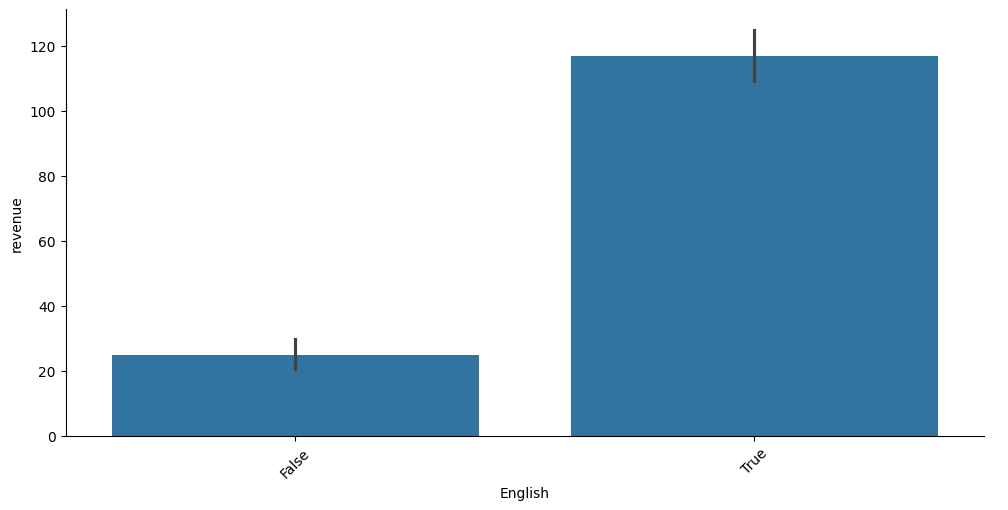

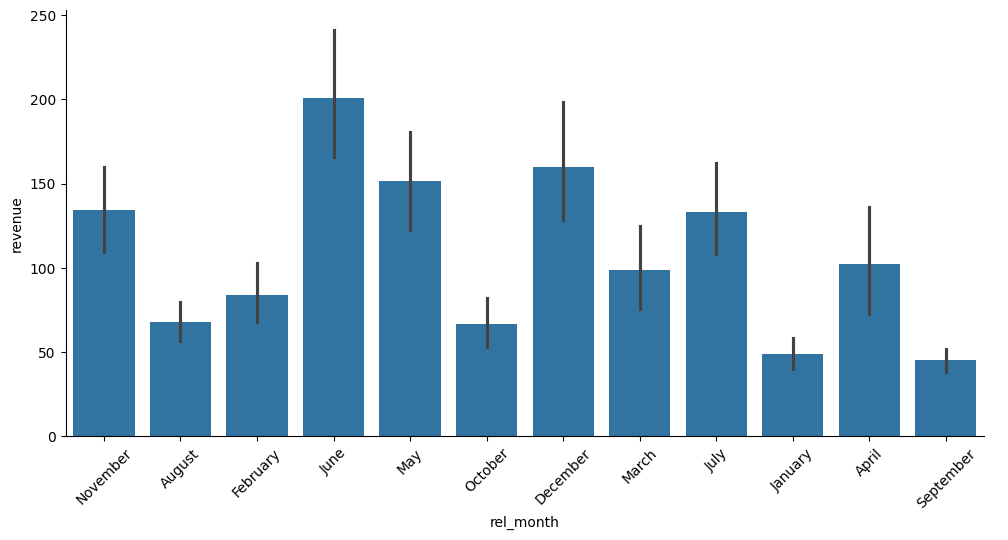

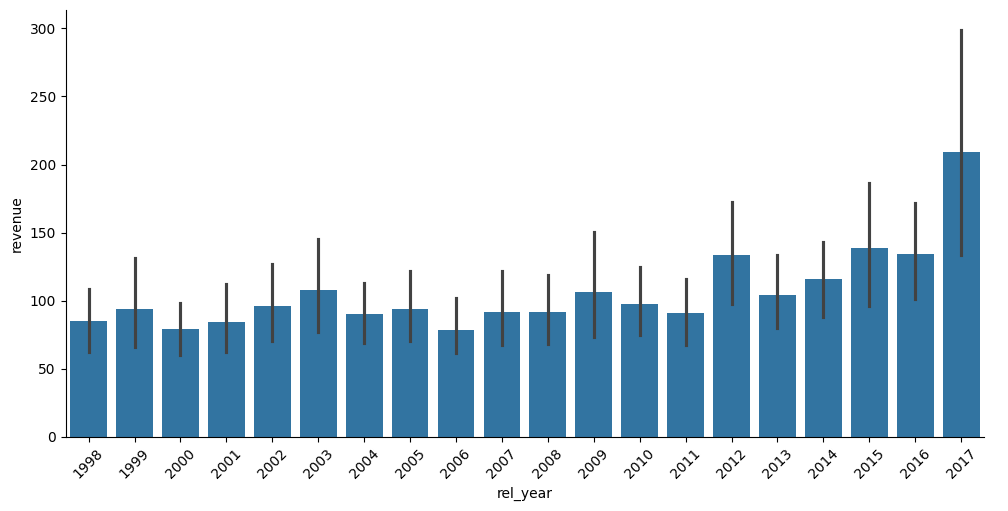

In [11]:
from seaborn import catplot
df_cats = X_train.select_dtypes(exclude=np.number).columns.tolist()
df_cats.append('rel_year')
for category in df_cats:
    catplot(x = category, y = 'revenue', data = X_train, aspect = 2, kind='bar')
    plt.xticks(rotation=45)
    plt.show()

In [15]:
df_copy = df.copy()
y = df_copy.pop(item='revenue')
X_train, X_test, y_train, y_test = train_test_split(df_copy, y, random_state=42, test_size=0.25, shuffle=True)
num_features = X_train.select_dtypes(include=np.number).columns.tolist()
text_features = X_train.select_dtypes(include='object').columns.tolist()

['budget', 'production_companies', 'vote_average', 'popularity', 'runtime', 'cast_size', 'crew_size', 'cast_tr', 'director_tr', 'production_company_tr', 'title_length', 'rel_year'] ['main_genre', 'rel_month']


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])
cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers = [
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, text_features)
    ], remainder= 'passthrough'
)
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['budget', 'production_companies',
                                  'vote_average', 'popularity', 'runtime',
                                  'cast_size', 'crew_size', 'cast_tr',
                                  'director_tr', 'production_company_tr',
                                  'title_length', 'rel_year']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot', OneHotEncoder())]),
                                 ['main_genre', 'rel_month'])])

In [39]:
import xgboost as xgb

model = xgb.XGBRegressor(random_state=42, tree_method='hist', booster='gbtree', device='cuda')
reg_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', model)
])
reg_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['budget',
                                                   'production_companies',
                                                   'vote_average', 'popularity',
                                                   'runtime', 'cast_size',
                                                   'crew_size', 'cast_tr',
                                                   'director_tr',
                                                   'production_company_tr',
                                                   'title_length',
                                                   'rel_year'...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [40]:
from sklearn.model_selection import RandomizedSearchCV

distributions =[{
    "model__max_depth": [3, 4, 5, 6, 7, 8, 9, 10],
    "model__n_estimators": [100, 150, 200],
    "model__learning_rate": [0.01, 0.03, 0.05, 0.07, 0.09, 0.11],
    "model__colsample_bytree": [0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    "model__subsample": [0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    "model__min_child_weight": [1, 3, 5, 7, 9, 11, 13],
    "model__gamma": [0, 1, 2, 3, 4, 5],
    "model__reg_alpha": [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
    "model__reg_lambda": [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
}]

n_iter = 60
n_jobs = -1 
scores = ["neg_root_mean_squared_error", "r2"]
refit = "neg_root_mean_squared_error" 
random_state = 42

rscv = RandomizedSearchCV(
    estimator = reg_pipeline, 
    param_distributions = distributions, 
    n_iter = n_iter,
    n_jobs = n_jobs, 
    scoring = scores,
    refit = refit, 
    random_state = random_state
)

search = rscv.fit(X_train, y_train)

In [43]:

search.best_params_

{'model__subsample': 0.7,
 'model__reg_lambda': 0.7,
 'model__reg_alpha': 0.7,
 'model__n_estimators': 100,
 'model__min_child_weight': 11,
 'model__max_depth': 6,
 'model__learning_rate': 0.05,
 'model__gamma': 5,
 'model__colsample_bytree': 0.6}

In [42]:
search.best_score_

-94.61913970572058

In [44]:
cv_results = pd.DataFrame(search.cv_results_)[[
    "params",
    "mean_test_neg_root_mean_squared_error",
    "mean_test_r2",
    "rank_test_neg_root_mean_squared_error",
    "rank_test_r2"
]]
cv_results = cv_results.sort_values("mean_test_neg_root_mean_squared_error", ascending=False)
cv_results

,params,mean_test_neg_root_mean_squared_error,mean_test_r2,rank_test_neg_root_mean_squared_error,rank_test_r2
19,"{'model__subsample': 0.7, 'model__reg_lambda':...",-94.619140,0.752470,1,1
33,"{'model__subsample': 0.6, 'model__reg_lambda':...",-94.885222,0.751042,2,2
43,"{'model__subsample': 0.9, 'model__reg_lambda':...",-95.013308,0.750279,3,3
24,"{'model__subsample': 0.9, 'model__reg_lambda':...",-95.129449,0.749163,4,5
15,"{'model__subsample': 0.8, 'model__reg_lambda':...",-95.158122,0.749473,5,4
52,"{'model__subsample': 1, 'model__reg_lambda': 0...",-95.355667,0.748654,6,6
7,"{'model__subsample': 1, 'model__reg_lambda': 0...",-95.448048,0.747521,7,7
32,"{'model__subsample': 0.9, 'model__reg_lambda':...",-95.616425,0.746715,8,8
45,"{'model__subsample': 0.9, 'model__reg_lambda':...",-95.725493,0.744299,9,12
38,"{'model__subsample': 0.7, 'model__reg_lambda':...",-95.727358,0.746284,10,9


In [45]:
search.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['budget',
                                                   'production_companies',
                                                   'vote_average', 'popularity',
                                                   'runtime', 'cast_size',
                                                   'crew_size', 'cast_tr',
                                                   'director_tr',
                                                   'production_company_tr',
                                                   'title_length',
                                                   'rel_year'...
                              feature_types=None, gamma=5, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None, min_child_weight=11,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              random_state=42, ...))])

In [47]:
from sklearn.metrics import mean_squared_error, r2_score

predictions = search.predict(X_test)
r2 = r2_score(y_test, predictions)
rms = mean_squared_error(y_test, predictions, squared=False)

print(f'R2: {r2}, rms: {rms}')

R2: 0.7388636076645292, rms: 87.11521158050043


c:\Users\Tom\Documents\Coding\MovieRevenue\.venv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
